# Import Libraries

In [84]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

In [2]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

In [52]:
# Bank of America
BAC = data.DataReader("BAC","yahoo", start, end)

# CitiGroup
C = data.DataReader("C","yahoo", start, end)

# Goldman Sachs
GS = data.DataReader("GS","yahoo",start,end)

# JPMorgan Chase
JPM = data.DataReader("JPM","yahoo",start,end)

#Morgan Stanley
MS = data.DataReader("MS","yahoo",start,end)

# Wells Fargo
WFC = data.DataReader("WFC","yahoo",start,end)

In [53]:
df = data.DataReader(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'],'yahoo', start, end)

In [54]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [55]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)

In [56]:
bank_stocks.head()

BAC                                                          \
                 High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2006-01-03  47.180000  46.150002  46.919998  47.080002  16296700.0  34.106041   
2006-01-04  47.240002  46.450001  47.000000  46.580002  17757900.0  33.743816   
2006-01-05  46.830002  46.320000  46.580002  46.639999  14970700.0  33.787266   
2006-01-06  46.910000  46.349998  46.799999  46.570000  12599800.0  33.736572   
2006-01-09  46.970001  46.360001  46.720001  46.599998  15619400.0  33.758297   

                     C                                      ...         MS  \
                  High         Low        Open       Close  ...       Open   
Date                                                        ...              
2006-01-03  493.799988  481.100006  490.000000  492.899994  ...  57.169998   
2006-01-04  491.000000  483.500000  488.600006  483.799988  ...  58.700001   
2006-01-05  487.799988  484.000000  484.399994  486.200012  ...  58.549999   
2006-01-06  489.000000  482.000000  488.799988  486.200012  ...  58.770000   
2006-01-09  487.399994  483.000000  486.000000  483.899994  ...  58.630001   

                                                   WFC                        \
                Close     Volume  Adj Close       High        Low       Open   
Date                                                                           
2006-01-03  58.310001  5377000.0  36.364140  31.975000  31.195000  31.600000   
2006-01-04  58.349998  7977800.0  36.389069  31.820000  31.365000  31.799999   
2006-01-05  58.509998  5778000.0  36.488869  31.555000  31.309999  31.500000   
2006-01-06  58.570000  6889800.0  36.526283  31.775000  31.385000  31.580000   
2006-01-09  59.189999  4144500.0  36.912933  31.825001  31.555000  31.674999   

                                              
                Close      Volume  Adj Close  
Date                                          
2006-01-03  31.900000  11016400.0  20.523809  
2006-01-04  31.530001  10870000.0  20.285755  
2006-01-05  31.495001  10158000.0  20.263241  
2006-01-06  31.680000   8403800.0  20.382265  
2006-01-09  31.674999   5619600.0  20.379047  

[5 rows x 36 columns]

In [57]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

# EDA

In [58]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

In [85]:
s = bank_stocks.xs(key='Close',axis=1,level='Stock Info')

In [59]:
returns = pd.DataFrame()

In [60]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


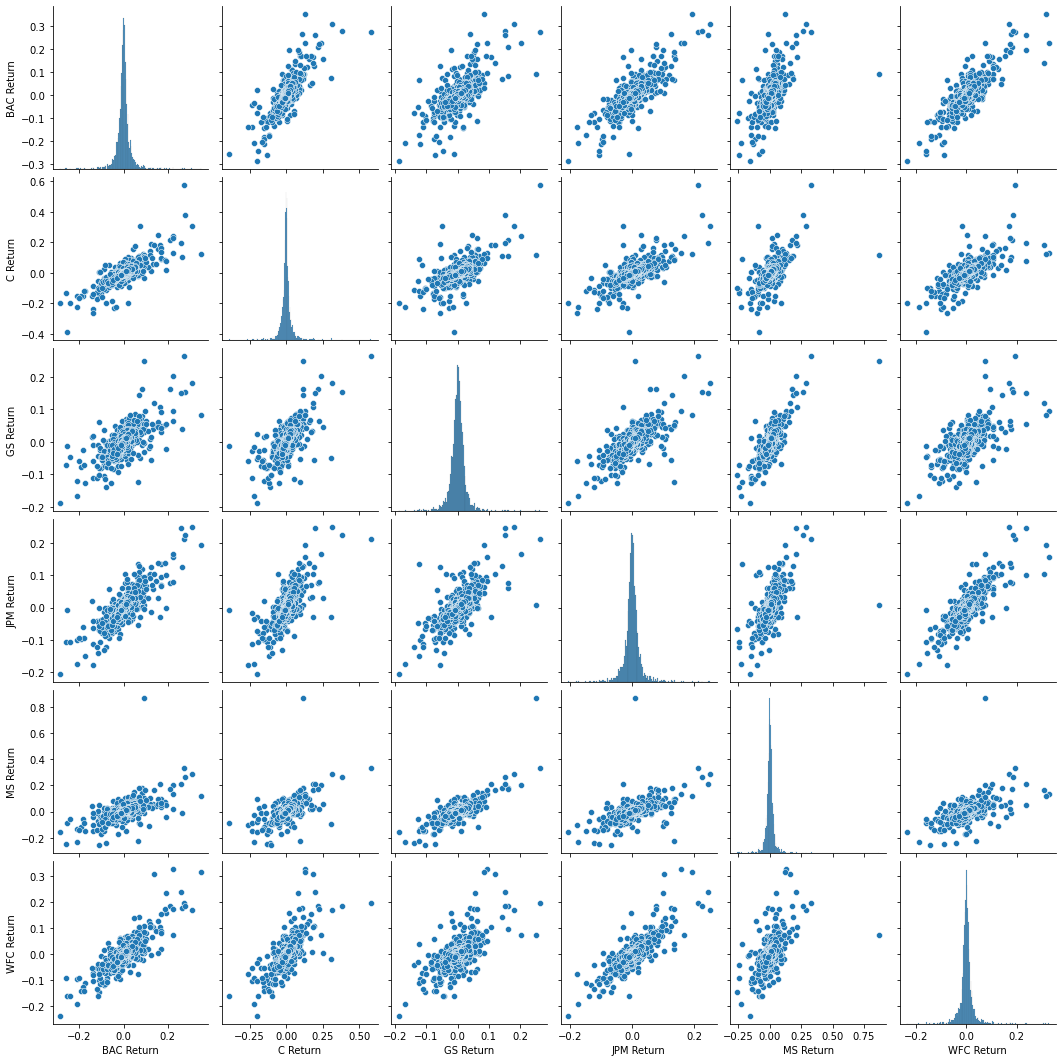

In [61]:
sns.pairplot(returns[1:])

In [62]:
max_index = returns.idxmax()

In [66]:
max_index

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [67]:
min_index = returns.idxmin()

In [68]:
min_index

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [69]:
returns.std()

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

In [71]:
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

In [77]:
a = returns['MS Return'].loc['2015-01-01':'2015-12-31']

C:\Users\vidsw\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MS Return', ylabel='Density'>

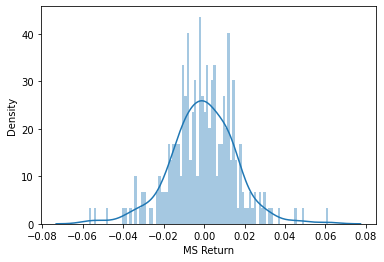

In [81]:
sns.distplot(a, bins=100)

In [82]:
b = returns['C Return'].loc['2008-01-01':'2008-12-31']

C:\Users\vidsw\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='C Return', ylabel='Density'>

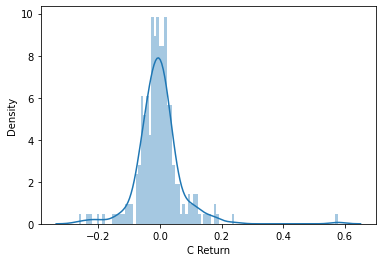

In [83]:
sns.distplot(b, bins=100)

<AxesSubplot:xlabel='Date'>

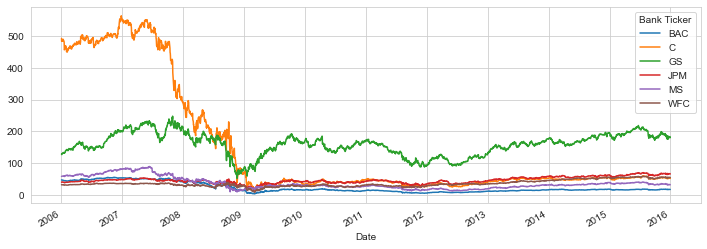

In [91]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot(figsize=(12,4),label=tick)

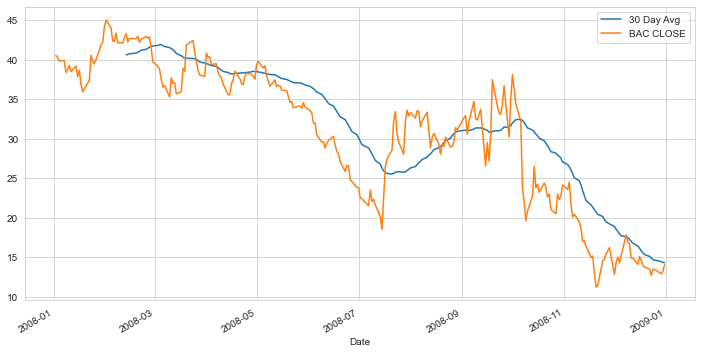

In [94]:
plt.figure(figsize=(12,6))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

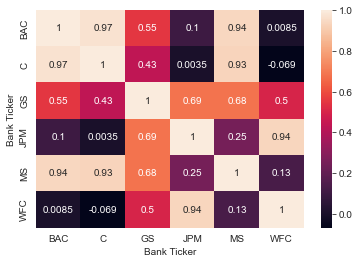

In [92]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

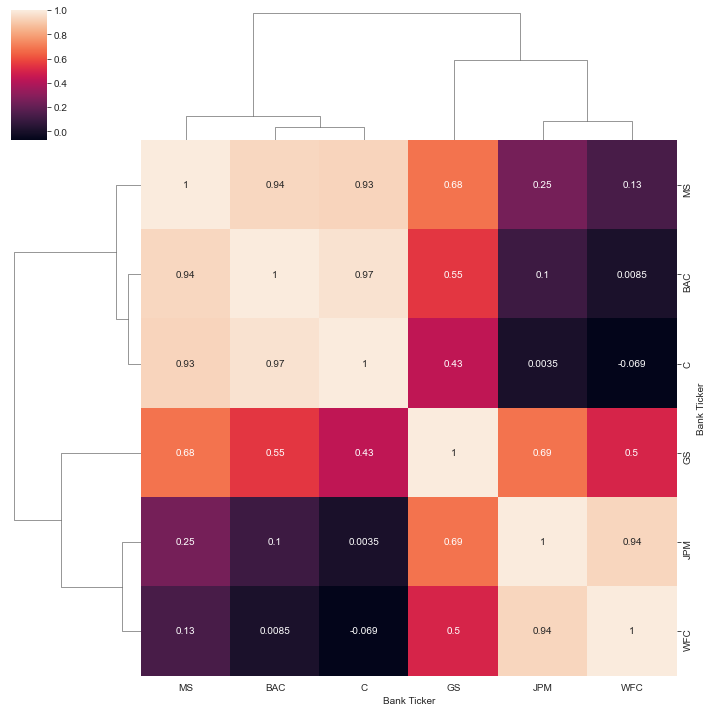

In [93]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)